In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Canny**

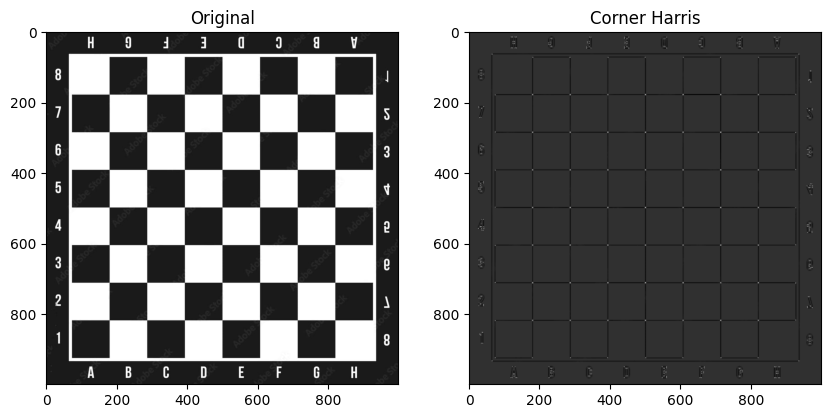

In [64]:
img = cv2.imread("chess.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(gray, cmap = 'gray')
corner = cv2.cornerHarris (src = gray, blockSize = 3, ksize=3, k = 0.04)
plt.subplot(1,2,2)
plt.title('Corner Harris')
plt.imshow(corner, cmap= 'gray')
plt.show()

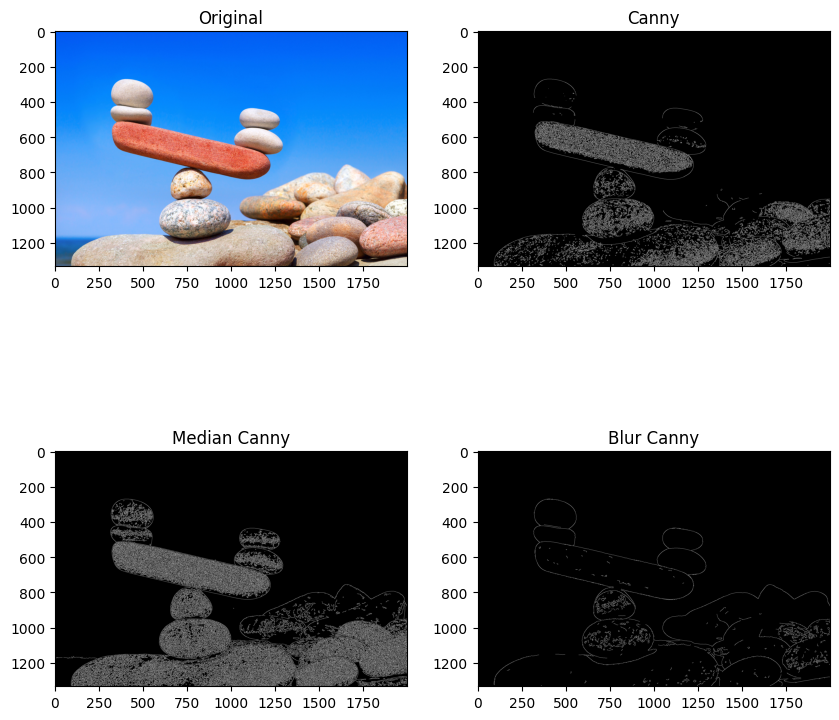

In [65]:
img = cv2.imread("untitled.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(img_rgb, cmap = 'gray')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,200)
plt.subplot(2,2,2)
plt.title('Canny')
plt.imshow(edges, cmap = 'gray')
m= np.median (img)
lower = 0.7 * m
upper = 0.3 * m
edges = cv2.Canny (img, lower, upper)
plt.subplot(2,2,3)
plt.title('Median Canny')
plt.imshow(edges, cmap = 'gray')
blur = cv2.blur(img, (6,6))
edges = cv2.Canny(blur, 75,150)
plt.subplot(2,2,4)
plt.title('Blur Canny')
plt.imshow(edges, cmap = 'gray')

# Bài tập:

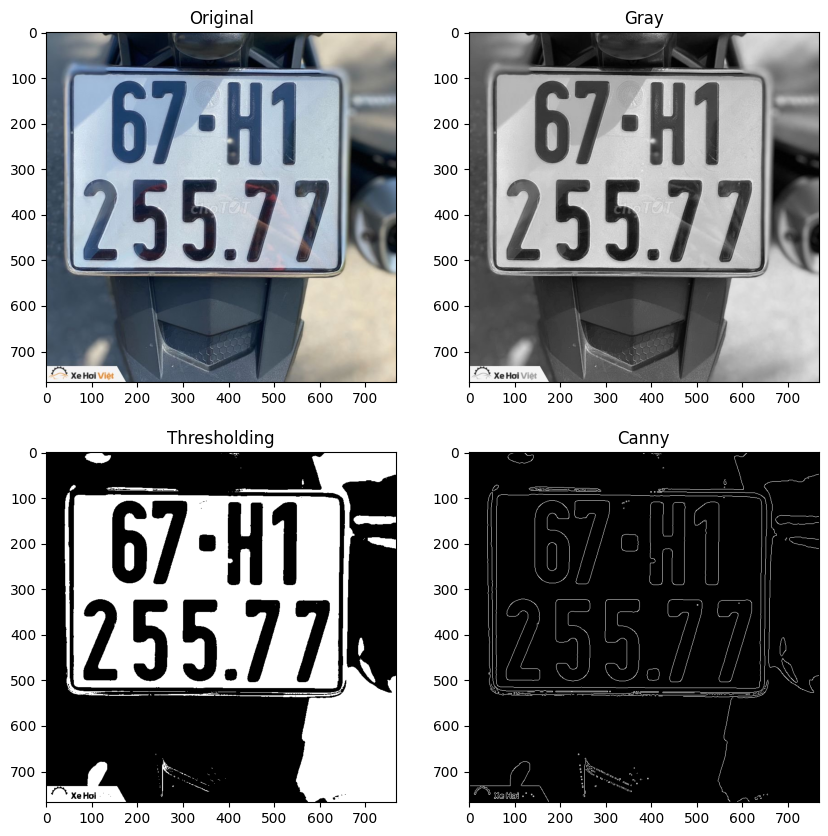

In [66]:
img = cv2.imread("biensoxe.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(img_rgb)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to gray
plt.subplot(2,2,2)
plt.title('Gray')
plt.imshow(gray, cmap = 'gray')
thresh = 150
# Sử dụng hàm cv2.threshold() để loại bỏ những điểm có độ sáng nhỏ hơn ngưỡng
_, thresholding = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)
plt.subplot(2,2,3)
plt.title('Thresholding')
plt.imshow(thresholding, cmap = 'gray')
edges = cv2.Canny(thresholding,100,200)
plt.subplot(2,2,4)
plt.title('Canny')
plt.imshow(edges, cmap = 'gray')
plt.show()

# **Contour**

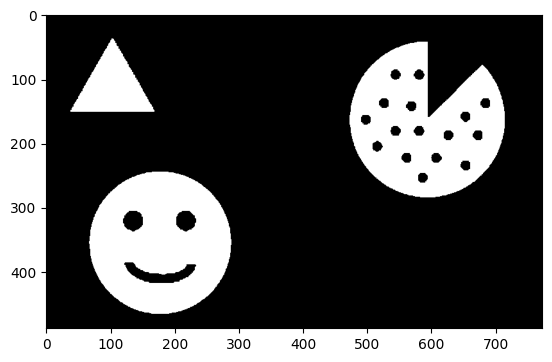

In [67]:
img = cv2.imread("icons.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Đặt ngưỡng
thresh = 47
# Sử dụng hàm cv2.threshold() để loại bỏ những điểm có độ sáng nhỏ hơn ngưỡng
_, thresholding = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)
plt.imshow(thresholding, cmap = 'gray')

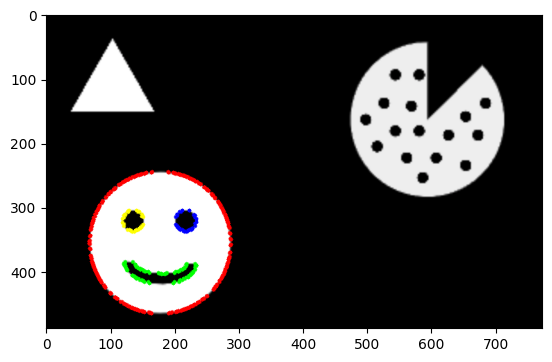

In [68]:
contour, hierachy = cv2.findContours(thresholding.copy(),
                                      cv2.RETR_CCOMP,
                                      cv2.CHAIN_APPROX_SIMPLE)
test=img.copy()
cv2.polylines(test, contour[0],isClosed = True, color = [255,0,0], thickness = 5)
cv2.polylines(test, contour[1],isClosed = True, color = [0,255,0], thickness = 5)
cv2.polylines(test, contour[2],isClosed = True, color = [0,0,255], thickness = 5)
cv2.polylines(test, contour[3],isClosed = True, color = [255,255,0], thickness = 5)
plt.imshow(test)

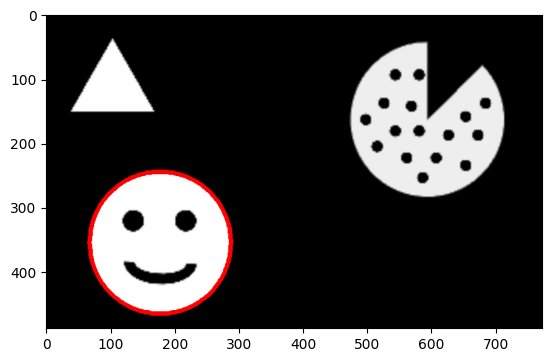

In [69]:
test=img.copy()
a = cv2.drawContours (test, contour, 0, color = [255,0,0], thickness = 5)
plt.imshow(a)

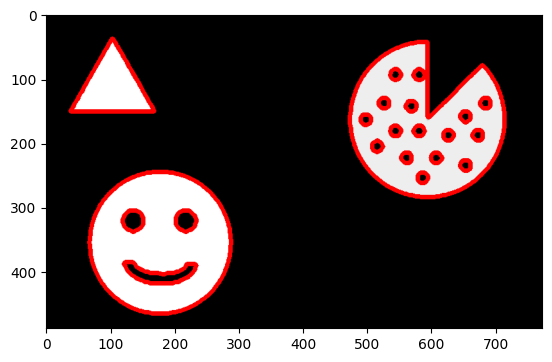

In [70]:
test = img.copy()
for i in range(len(contour)):
  a = cv2.drawContours (test, contour, i, color =[255,0,0], thickness=5)
plt.imshow(a)


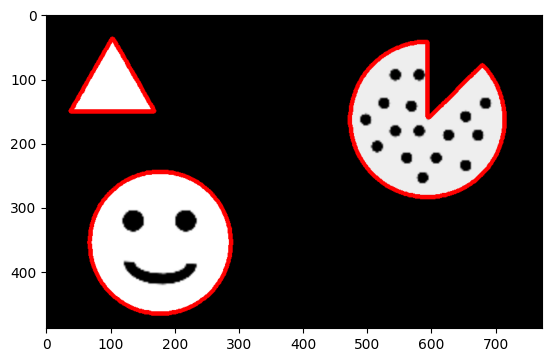

In [71]:
test = img.copy()
for i in range(len(contour)):
  if hierachy[0][i][3] == -1:
    a = cv2.drawContours (test, contour, i, color = [255,0,0], thickness = 5)
plt.imshow(a)

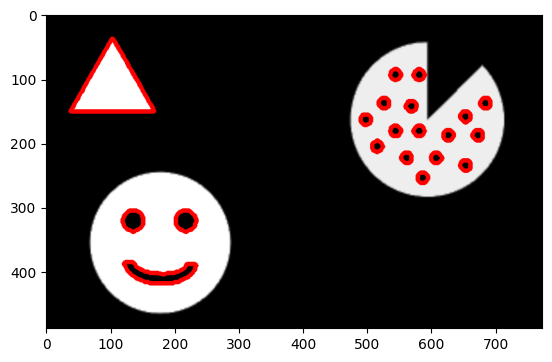

In [72]:
test = img.copy()
for i in range(len(contour)):
  if hierachy[0][i][2] == -1:
    a = cv2.drawContours (test, contour, i, color = [255,0,0], thickness = 5)
plt.imshow(a)

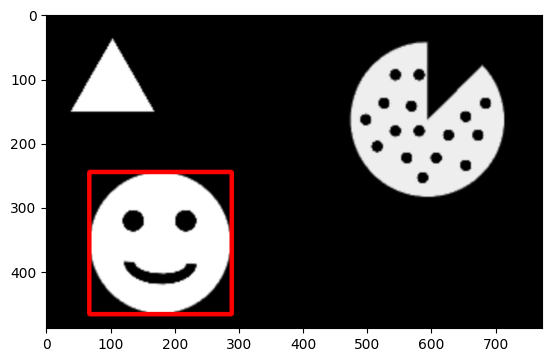

In [73]:
test = img.copy()
x1,y1,w,h= cv2.boundingRect(contour[0])
a = cv2. rectangle(test, (x1,y1), (x1+w, y1+h), color =[255,0,0], thickness= 5)
plt.imshow(a)

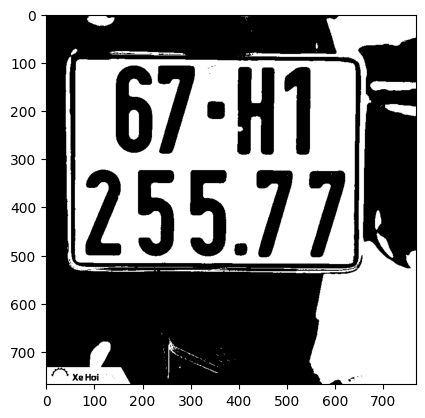

In [74]:
img = cv2.imread("biensoxe.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = 150
# Sử dụng hàm cv2.threshold() để loại bỏ những điểm có độ sáng nhỏ hơn ngưỡng
_, thresholding = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)
plt.imshow(thresholding, cmap = 'gray')

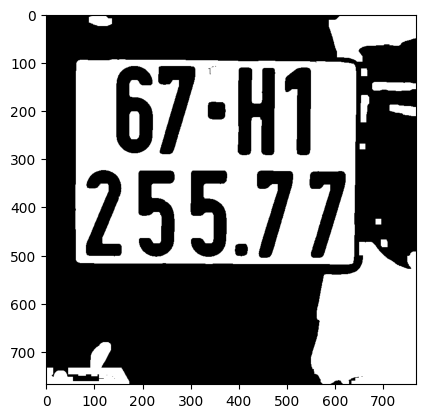

In [75]:
# # Erosion followed by dilation để lọc gợn ảnh
kernel = np.ones((12,12),np.uint8)
opening = cv2.morphologyEx(thresholding, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap = 'gray')

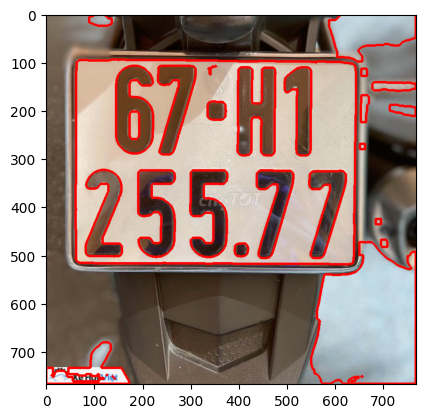

In [76]:
contour, _ = cv2.findContours(opening, cv2.RETR_CCOMP,
                                      cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contour)):
  cv2.drawContours (opening, contour, i, color =[255,0,0], thickness=3)
  cv2.drawContours (img, contour, i, color =[255,0,0], thickness=3)
# plt.imshow(a)
plt.imshow(img)

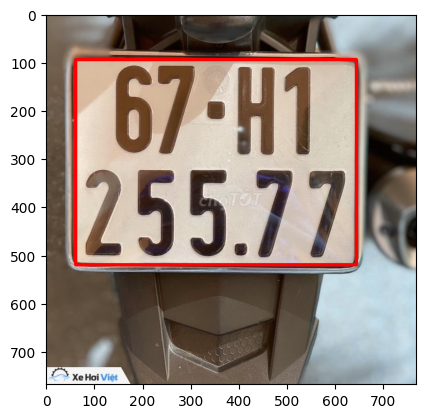

In [77]:
img = cv2.imread("biensoxe.png")

#cách 1
MAX_w = 800
MIN_W = 300
test = img.copy()

if len(contour) > 0:
  for c in contour:
    x, y, w, h = cv2.boundingRect(c)
    ar = w/ h
    if (max (w, h) < MAX_w) and (min (w, h)> MIN_W) and (np.abs (1.0 -ar) <0.5):
      cv2.rectangle(test, (x,y), (x+w, y+h), (255,0,0),5)
      break
plt.imshow(test)

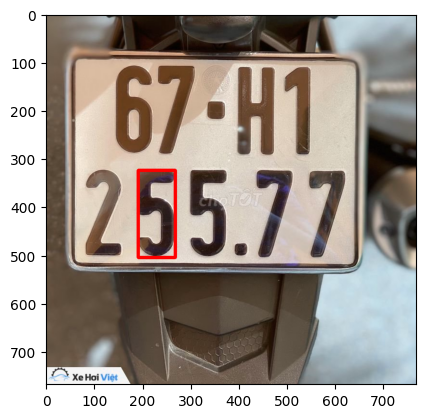

In [78]:
#cách 2
test=img.copy()
for i in contour:
  x1,y1,w,h= cv2.boundingRect (contour[19])
  cv2.rectangle(test, (x1,y1), (x1+w, y1+h), color = [255,0,0], thickness = 5)
  plt.imshow(test)

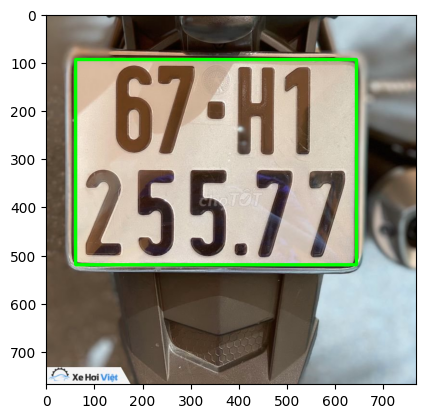

In [79]:
#cách 3
test = img.copy()
area_cnt = [cv2.contourArea (cnt) for cnt in contour]
area_sort = np.argsort (area_cnt) [::-1]
cnt = contour [area_sort[0]]
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(test, (x,y), (x+w, y+h), (0,255,0),5)
plt.imshow(test)

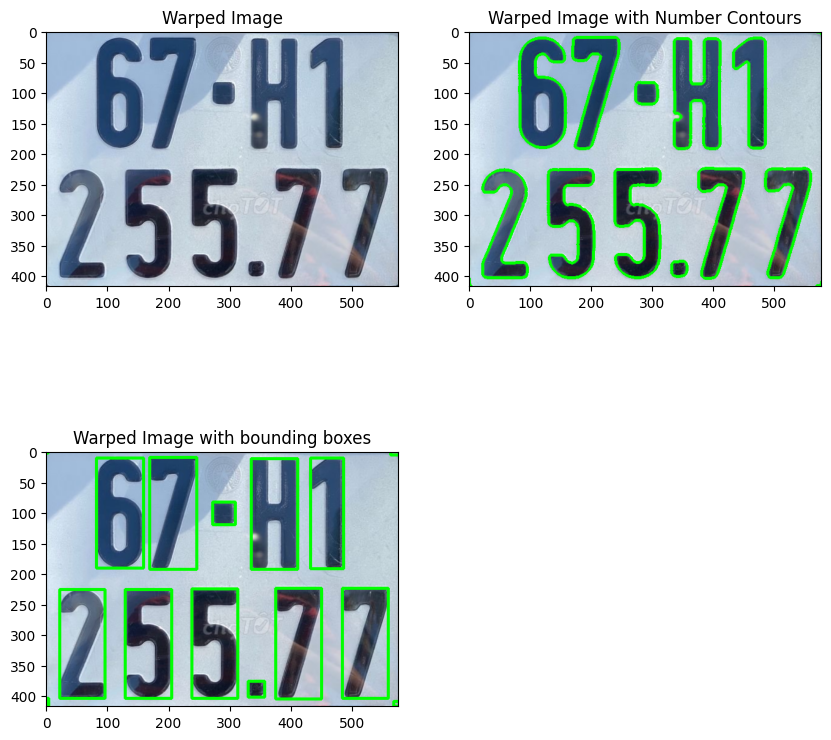

In [80]:
# Read the image
img = cv2.imread("biensoxe.png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(gray, 50, 200)

# Find contours in the edged image
contours, hierachy = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

# Loop over our contours to find the license plate contour
plate_contour = None
for c in contours:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    # if our approximated contour has four points, we can assume that we have found our license plate
    if len(approx) == 4:
        plate_contour = approx
        break

# If a license plate contour was found
if plate_contour is not None:
    # Get the bounding rectangle for the license plate contour
    rect = cv2.minAreaRect(plate_contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # Get the dimensions for the transform matrix
    width = int(rect[1][0])
    height = int(rect[1][1])

    src_pts = box.astype("float32")
    dst_pts = np.array([[0, height-1],
                        [0, 0],
                        [width-1, 0],
                        [width-1, height-1]], dtype="float32")

    # Get the perspective transform matrix and warp the image to get a top-down view of it
    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    warped = cv2.warpPerspective(img, M, (width, height))

# Convert color space for matplotlib
warped_rgb = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)

# Display the rotated image using matplotlib
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(warped_rgb)
plt.title('Warped Image')

# Convert the warped image to grayscale
warped_gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to convert the grayscale image to binary
_, threshold = cv2.threshold(warped_gray, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours in the binary image
number_contours, hierachy = cv2.findContours(threshold.copy(), cv2.RETR_CCOMP,
                                                      cv2.CHAIN_APPROX_SIMPLE)

warped_rgb_copy = warped_rgb.copy()

# Draw contours on the original image
for i in range(len(number_contours)):
  if hierachy[0][i][3] == -1:
    a = cv2.drawContours (warped_rgb_copy, number_contours, i, color = [0,255,0], thickness = 3)

# Display the image with contours using matplotlib
plt.subplot(2,2,2)
plt.title('Warped Image with Number Contours')
plt.imshow(a)

test = warped_rgb.copy()
# Draw bounding box on all numbers
for i in range(len(number_contours)):
  if hierachy[0][i][3] == -1:
    x1,y1,w,h= cv2.boundingRect(number_contours[i])
    a = cv2.rectangle(test, (x1,y1), (x1+w, y1+h), color =[0,255,0], thickness= 3)
plt.subplot(2,2,3)
plt.imshow(a)
plt.title('Warped Image with bounding boxes')
plt.show()

plt.show()